In [10]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## Analytical approach implementation

In [3]:
def analytical_linear_regression(x, y):
    n = len(x)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    
    num = -x@y + sum_x*sum_y/n
    denom = -np.sum(x**2) + (sum_x**2)/n
    a = num / denom
    
    b = (sum_y - a*sum_x) / n
    
    return a, b

## Using the implementation on the diabetes data

In [13]:
df_diabetes = pd.read_csv("diabetes.csv")

# select feature and lebal
y = df_diabetes["diabetes_progression"].to_numpy()
x = df_diabetes["bmi"].to_numpy()

# split data
train_x, test_x, train_y, test_y = train_test_split(x, y)

# create model
a, b = analytical_linear_regression(train_x, train_y)
print(a, b)

# predict on test data and evaluate
pred_y = a*test_x + b

# evaluation
print(mean_squared_error(test_y, pred_y, squared=False))

10.55988717454291 -127.4621931130261
62.86850407155418


## Visualization

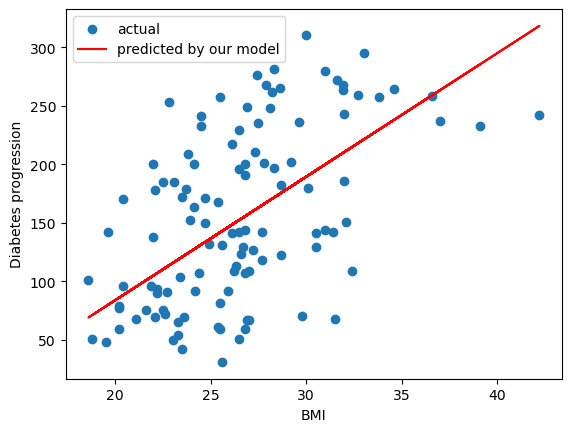

In [17]:
import matplotlib.pyplot as plt

plt.scatter(test_x, test_y, label="actual")
plt.plot(test_x, pred_y, color="red", label="predicted by our model")
plt.xlabel("BMI")
plt.ylabel("Diabetes progression")

plt.legend()